# 九章 KNN 教程 

https://www.kaggle.com/c/digit-recognizer

# 导入数据

In [2]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
import matplotlib.pyplot as plt # 画图常用库

从 `../train.csv` and `../test.csv` 文件里面读入 numpy arrays.

导入数据后打印shape查看是否数据是否完整

导入数据差不多10秒

In [5]:
def load_data(path, train_row):
    train = pd.read_csv(path+'train.csv')
    print(train.shape)
    print(train.head())
    X_train = train.values[:train_row, 1:]
    y_train = train.values[:train_row, 0]
    test = pd.read_csv(path+'test.csv').values
    return X_train, y_train, test

X_train, y_train, test = load_data('../input/', 5000)

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

In [8]:
type(X_train)
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  29 207 253 235  77   0   

# 用图像展示一下数据集

4


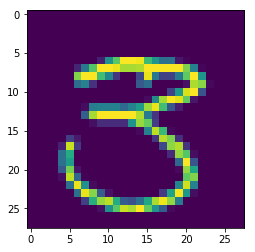

In [13]:
import matplotlib
import matplotlib.pyplot as plt
row = 7
print(y_train[3])  # print label

plt.imshow(X_train[row].reshape(28,28))
plt.show()


展示部分数据看看图片是什么样子的。（有兴趣的同学可以自己看）

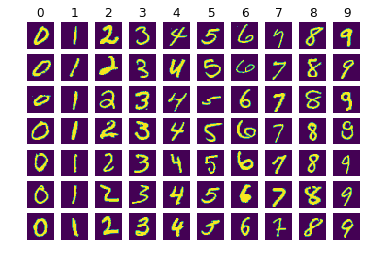

In [32]:
classes = ['0','1','2','3','4','5','6','7','8','9']
sample = 4
#print(y_train)

for y, clas in enumerate(classes):
    idxs = np.nonzero([i==y for i in y_train]) #row number whose label == y
    #print(idx[0])
    idxs = np.random.choice(idxs[0], row)
    for i, idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(row, len(classes), plt_idx)
        plt.imshow(X_train[idx].reshape(28,28))
        plt.axis('off')
        if i==0:
            plt.title(clas)

plt.show()

把原本的训练数据拆分成为20%测试集（8400个），80%训练集（33600个）

怎么样2/8分

In [34]:
from sklearn.model_selection import train_test_split
X_train_split, X_vali, y_train_split, y_vali = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train_split.shape, X_vali.shape, y_train_split.shape, y_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)



下面进行KNN模型训练
如果是大数据，需要1.5小时跑完

In [39]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,8)
score = []

for k in k_range:
    print('k= '+ str(k) +' begin:')
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_split, y_train_split)
    y_pred = knn.predict(X_vali)
    accuracy = accuracy_score(y_vali, y_pred)
    score.append(accuracy)
    end = time.time()
    print(classification_report(y_vali, y_pred))  
    print(confusion_matrix(y_vali, y_pred))  
    print("Complete time: " + str(end-start) + " Secs.")
    

k= 1 begin:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.90      0.98      0.94       100
           2       0.97      0.88      0.92       104
           3       0.89      0.93      0.91       100
           4       0.93      0.93      0.93       107
           5       0.95      0.88      0.92        94
           6       0.93      0.97      0.95        93
           7       0.92      0.94      0.93       116
           8       0.89      0.85      0.87        85
           9       0.85      0.85      0.85        98

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1 

# 通过训练我们可以找到最好的测试数据集，打印出Accuracy的图

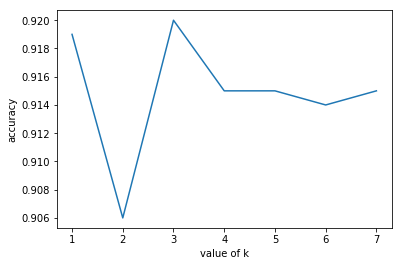

In [41]:
plt.plot(k_range, score)
plt.xlabel('value of k')
plt.ylabel('accuracy')
plt.show()

# 预测测试数据集的结果


In [42]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
pred = knn.predict(test[:300])


# 验证一下结果

0


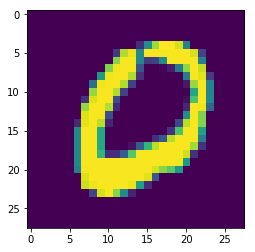

In [44]:
print(pred[210])
plt.imshow(test[210].reshape(28,28))
plt.show()

# 预测之后，我们把预测好的数据打印到文件Digit_Recogniser_Result.csv里面。
# 打印的格式是如下

* ImageId	Label
* 1	2
* 2	0
* 3	9
* 4	9

In [45]:
pd.DataFrame({'ImageId':list(range(1,len(pred)+1)),'Label':pred}).to_csv('Digit_Recogniser_Result.csv',index=False, header=True)
